<a href="https://colab.research.google.com/github/gorakhgupta00/Web_Scraping__1/blob/main/Numerical_Programming_in_Python_Analyze_it_Yourself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






# **Project Summary:**


This Python script is a web scraping project that automates the collection of job listings for the position of "Data Analyst" from the TimesJobs website. The project demonstrates how to use the requests library to send HTTP GET requests, BeautifulSoup for parsing HTML content, and pandas to organize the extracted data into a structured format. It iterates through multiple search result pages and extracts key details from each job listing, including the company name, required skills, years of experience, location, job description, and a direct link to the job posting. The collected data is then stored in a Pandas DataFrame and saved to a CSV file for further analysis or reference.

# **Explanation:**

This Python web scraping project is designed to automate the process of gathering job listings for the position of **"Data Analyst"** from the TimesJobs website. The project demonstrates the step-by-step process of collecting data from a web source using various Python libraries.

1. Import Necessary Libraries:

*    The script begins by importing the required Python libraries:requests, BeautifulSoup, and pandas.


2. Set the Base URL and Search Parameters:

*     The base URL for the TimesJobs website is defined as "https://www.timesjobs.com/candidate/job-search.html."
*     A dictionary named "parameters" is used to store the search parameters. These parameters include search type, search keywords (e.g., "Python Developer"), location (e.g., "India"), and the initial page number (startPage).
3. Create an Empty List for Job Data:

*    An empty list named "jobs_data1" is created to store the scraped job data.
4.  Scrape Data from Multiple Pages:

*    The script enters a loop to scrape data from multiple search result pages. It continues scraping until the "startPage" parameter exceeds the "sequence" parameter, which determines the number of pages to scrape.
5. Send an HTTP GET Request:

*    Inside the loop, an HTTP GET request is sent to the TimesJobs website with the specified parameters using the requests library.
6.  Parse HTML Content:

*    The HTML content of the response is parsed using BeautifulSoup with the 'lxml' parser.
7.  Find Job Listings:

*     Job listings are identified by finding HTML elements with the class 'clearfix job-bx wht-shd-bx.'
8.   Extract Job Data:

*     For each job listing, relevant information is extracted and stored in a dictionary named "data," including the company name, required skills, years of experience, location(s), job description, and a link to the job posting.
9.  Append Data to the List:

*    The "data" dictionary is appended to the "jobs_data1" list for each job listing found on the page.
10.   Increment the Page Parameter:

*    The "startPage" parameter is incremented to move to the next page of search results.
11.  Create a Pandas DataFrame:

*     Once all the job data has been collected, a Pandas DataFrame is created from the "jobs_data1" list.
12.   Save Data to a CSV File:

*     The DataFrame is saved to a CSV file named "job_listings10.csv," excluding the index column.

This project demonstrates how to scrape job listings from a website, parse the HTML content, extract specific data, and store it in a structured format using Python.It showcases a practical use case of web scraping for job-related information and provides a foundation for similar data extraction tasks from other websites.


In [2]:
#import some python library
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
#Implementin web scrapping on Timesjobs.com

def scrape_jobs(url, keywords, location, sequence, output_filename):
    # Define search parameters for TimesJobs website
    search_params = {
        'searchType': 'personalizedSearch',
        'from': 'submit',
        'luceneResultSize': 50,  # Number of items per page
        'txtKeywords': keywords,  # Keywords to search for
        'txtLocation': location,  # Location for the search
        'sequence': sequence,  # Number of pages to scrape
        'startPage': 1  # Start page for scraping
    }

    jobs_data = []  # Initialize an empty list to store job data

    while search_params['startPage'] <= search_params['sequence']:
        # Send an HTTP GET request to the TimesJobs website with the search parameters
        response = requests.get(url, params=search_params)
        soup = BeautifulSoup(response.text, 'lxml')  # Parse the response with BeautifulSoup
        jobs = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')  # Find job listings on the page

        if not jobs:
            break  # If no job listings are found, exit the loop

        for job in jobs:
            data = {}  # Create a dictionary to store job data
            data['Company'] = job.find('h3', class_='joblist-comp-name').get_text(strip=True)  # Extract company name
            data['Skills'] = job.find('span', class_='srp-skills').get_text(strip=True)  # Extract required skills

            ul = job.find('ul', class_='top-jd-dtl clearfix').findChildren(recursive=False)
            data['Exp'] = ul[0].find(text=True, recursive=False)  # Extract job experience

            data['Location(s)'] = ul[1].span.text if ul[1].span else None  # Extract job location(s)

            ul1 = job.find('ul', class_='list-job-dtl clearfix').findChildren(recursive=False)
            data['Desc'] = ul1[0].find('label').next_sibling.strip()  # Extract job description

            data['link'] = job.header.h2.a['href']  # Extract job link
            jobs_data.append(data)  # Append the extracted job data to the list

        search_params['startPage'] += 1  # Increment the startPage parameter to scrape the next page

    df = pd.DataFrame(jobs_data)  # Create a Pandas DataFrame from the scraped job data

    # Save the DataFrame to a CSV file, excluding the index column
    df.to_csv(output_filename, index=False)

    return df  # Return the DataFrame containing the scraped job data

In [4]:
# calling the function to scrape jobs and save to a CSV file
df = scrape_jobs("https://www.timesjobs.com/candidate/job-search.html", "Data Analyst", "India", 3, "job_listings10.csv")

<ipython-input-3-32fa30c75cf4>:32: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  data['Exp'] = ul[0].find(text=True, recursive=False)  # Extract job experience


# **Performing EDA Operation:**

In [5]:
df.sample(20)

,Company,Skills,Exp,Location(s),Desc,link
132,ace softex pvt. ltd.,"project execution , engineering , experien...",1 - 4 yrs,Rajkot,Job Description: Responsible for project execu...,https://www.timesjobs.com/job-detail/team-lead...
22,e-con systems india pvt.ltd.,"power bi ,datamodeling , dax queries ,dat...",7 - 10 yrs,Chennai,JOB ID: e-con028Job Synopsis:Position: Lead Bu...,https://www.timesjobs.com/job-detail/job-id-e-...
14,bitscape infotech pvt. ltd.,"power bi desktop , power bi administration...",2 - 5 yrs,Ahmedabad,Power BI DeveloperJob Code: BBISEP20Ahmedabad ...,https://www.timesjobs.com/job-detail/power-app...
30,InteleANTS Virtual Workforce Private Limited,"mysql , api , python , adf , nosql , ...",5 - 8 yrs,Chennai,Roles & Responsibilities:1. Data Architectur...,https://www.timesjobs.com/job-detail/data-ware...
20,AMAZON INDIA PVT LTD,"dataanalytics , business analysis , pr...",8 - 10 yrs,Hyderabad/Secunderabad,"Business Analytics Manager , ROC , ROC Job I...",https://www.timesjobs.com/job-detail/business-...
139,Vitrana,"html5 , softwaredesign , bootstrap , sec...",6 - 10 yrs,"Noida/Greater Noida, Bengaluru / Bangalore",We are looking for highly experienced UI Tech ...,https://www.timesjobs.com/job-detail/angular-u...
13,IDP EDUCATION INDIA PVT LTD,"dataanalysis , digital analytics , goo...",3 - 4 yrs,Chennai,Digital Analytics Analyst Digital Campus - Dat...,https://www.timesjobs.com/job-detail/digital-a...
82,ace softex pvt. ltd.,"project execution , engineering , experien...",1 - 4 yrs,Rajkot,Job Description: Responsible for project execu...,https://www.timesjobs.com/job-detail/team-lead...
126,Ace System(More Jobs),"java , Html , Css , asp.net ,DataAnalys...",0 - 3 yrs,None,Developing and maintaining all server-side net...,https://www.timesjobs.com/job-detail/software-...
135,Information Services Group,"outsourcing , technology research , it r...",7 - 9 yrs,Bengaluru / Bangalore,Research Analyst - Lead Research Specialist (...,https://www.timesjobs.com/job-detail/research-...


In [6]:
#get the information of data using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      150 non-null    object
 1   Skills       150 non-null    object
 2   Exp          150 non-null    object
 3   Location(s)  126 non-null    object
 4   Desc         150 non-null    object
 5   link         150 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB


# **Data Cleaning**

In [7]:
#total null values in perticular column:
df.isnull().sum()

Company         0
Skills          0
Exp             0
Location(s)    24
Desc            0
link            0
dtype: int64

In [8]:
# Extracting the rows having null column value:
rows_with_null= df[df.isnull().any(axis=1)]
rows_with_null.head(10)

,Company,Skills,Exp,Location(s),Desc,link
12,Sunil Upadhyay(More Jobs),"Business Development Manager , project manag...",2 - 7 yrs,None,We are looking for a project manager to be res...,https://www.timesjobs.com/job-detail/project-m...
21,Sunil Upadhyay(More Jobs),"Hr Administrator , Hr Executive , human re...",2 - 7 yrs,None,We are looking to employ an HR assistant with ...,https://www.timesjobs.com/job-detail/hr-assist...
23,Laxmi Infotech(More Jobs),"Finance , Banking , accounts , Sales Tax...",0 - 3 yrs,None,Job descriptionPreparing Audit PlansAnalysis o...,https://www.timesjobs.com/job-detail/account-e...
24,Laxmi Infotech(More Jobs),"Finance , Banking , accounts , Sales Tax...",0 - 3 yrs,None,Job descriptionPreparing Audit PlansAnalysis o...,https://www.timesjobs.com/job-detail/account-e...
25,Ace System(More Jobs),"java , Html , Css , asp.net ,DataAnalys...",0 - 3 yrs,None,Developing and maintaining all server-side net...,https://www.timesjobs.com/job-detail/software-...
26,Ace System(More Jobs),"java , Html , Css , asp.net ,DataAnalys...",0 - 3 yrs,None,Developing and maintaining all server-side net...,https://www.timesjobs.com/job-detail/software-...
28,GENIQUE MANAGEMENT SERVICES PRIVATE LIMITED(Mo...,"full stack , java , Html , css , .net ...",6 - 11 yrs,None,Hi We are hiring for various IT positions .Sof...,https://www.timesjobs.com/job-detail/full-stac...
37,GENIQUE MANAGEMENT SERVICES PRIVATE LIMITED(Mo...,"java , react , javasc , css , html , ...",4 - 9 yrs,None,Hi We are hiring for various IT positions .Sof...,https://www.timesjobs.com/job-detail/full-stac...
62,Sunil Upadhyay(More Jobs),"Business Development Manager , project manag...",2 - 7 yrs,None,We are looking for a project manager to be res...,https://www.timesjobs.com/job-detail/project-m...
71,Sunil Upadhyay(More Jobs),"Hr Administrator , Hr Executive , human re...",2 - 7 yrs,None,We are looking to employ an HR assistant with ...,https://www.timesjobs.com/job-detail/hr-assist...


Most of the company with  None job location are the consultancy which works for different company so they not mention the job location, so we can not drop these rows.

In [9]:
#check the duplicate rows available in data
df.duplicated().sum()

100

We get the total 100 duplicate rows in the dataset.We had decided to not drop duplicate values because they have the similar  value for each column but for different position and skill set.

**Cleaning And Formating the "Exp" column to Extract numeric experience values**

In [14]:
# Clean and format the 'Exp' column
df['Exp'] = df['Exp'].str.replace(' yrs', '').str.replace(' Yrs', '').str.replace('yr', '').str.replace('Yr', '').str.strip()
df['Exp'] = df['Exp'].str.extract(r'(\d+)').astype(float)


**Cleaning  and formatting the 'Location(s)' column to remove extra spaces**

In [15]:
# Clean and format the 'Location(s)' column to remove extra spaces
df['Location(s)'] = df['Location(s)'].str.replace('\s+', ' ', regex=True).str.strip()


**Cleaning and formatting the 'Skills' column by stripping extra whitespace**

In [16]:
# Clean and format the 'Skills' column by stripping extra whitespace
df['Skills'] = df['Skills'].str.strip()

In [17]:
df.sample(10)

,Company,Skills,Exp,Location(s),Desc,link
0,buck global llc,"dataanalysis , hypothesis testing , mo...",2.0,Pune,"About This Role:This person will extract , tr...",https://www.timesjobs.com/job-detail/de-jobs-c...
49,ushur technologies,"dataanalytics , statistical techniques ,...",5.0,Bengaluru / Bangalore,"Analytics Architect Bengaluru , KASystem Arch...",https://www.timesjobs.com/job-detail/analytics...
42,IDP EDUCATION INDIA PVT LTD,"datavisualization , power bi , tableau...",4.0,Chennai,Data Visualization Engineer Digital Campus - D...,https://www.timesjobs.com/job-detail/data-visu...
113,IDP EDUCATION INDIA PVT LTD,"dataanalysis , digital analytics , goo...",3.0,Chennai,Digital Analytics Analyst Digital Campus - Dat...,https://www.timesjobs.com/job-detail/digital-a...
115,Alstom Projects India Ltd.,"power bi ,dataanalyst, business intelligenc...",2.0,Bengaluru / Bangalore,Project & Bid Academy Power BI DeveloperDate...,https://www.timesjobs.com/job-detail/project-b...
50,buck global llc,"dataanalysis , hypothesis testing , mo...",2.0,Pune,"About This Role:This person will extract , tr...",https://www.timesjobs.com/job-detail/de-jobs-c...
136,IDP EDUCATION INDIA PVT LTD,"algorithms , software engineering ,datastru...",10.0,Chennai,Job DescriptionAn ASX100 business part that is...,https://www.timesjobs.com/job-detail/data-scie...
98,Nielsen Research Ltd. Co.,"project management , risk management , ...",4.0,Bengaluru / Bangalore,"MANAGER - PROJECT MANAGER Bangalore , IndiaOp...",https://www.timesjobs.com/job-detail/nielsen-m...
94,netskope software pvt.ltd,"bigdataecosystems , cloud computing , ...",4.0,Bengaluru / Bangalore,"About Netskope Today , there's more data and ...",https://www.timesjobs.com/job-detail/sr-softwa...
105,HR Empower Consultancy(More Jobs),"Ms Office , advanced excel , Microsoft Wor...",0.0,"Anantnag, Budgam, Jammu, Pulwama, Rajouri",Data Entry Analyst Job Dutieseviewing data for...,https://www.timesjobs.com/job-detail/data-entr...


In data cleaning process we remove the rows having duplicte values , null values and also remove extra spaces from the values and formatting the data.
**Data is cleaned and formated.**

# **Data Visualization**

**1. Count of jobs listing by company**

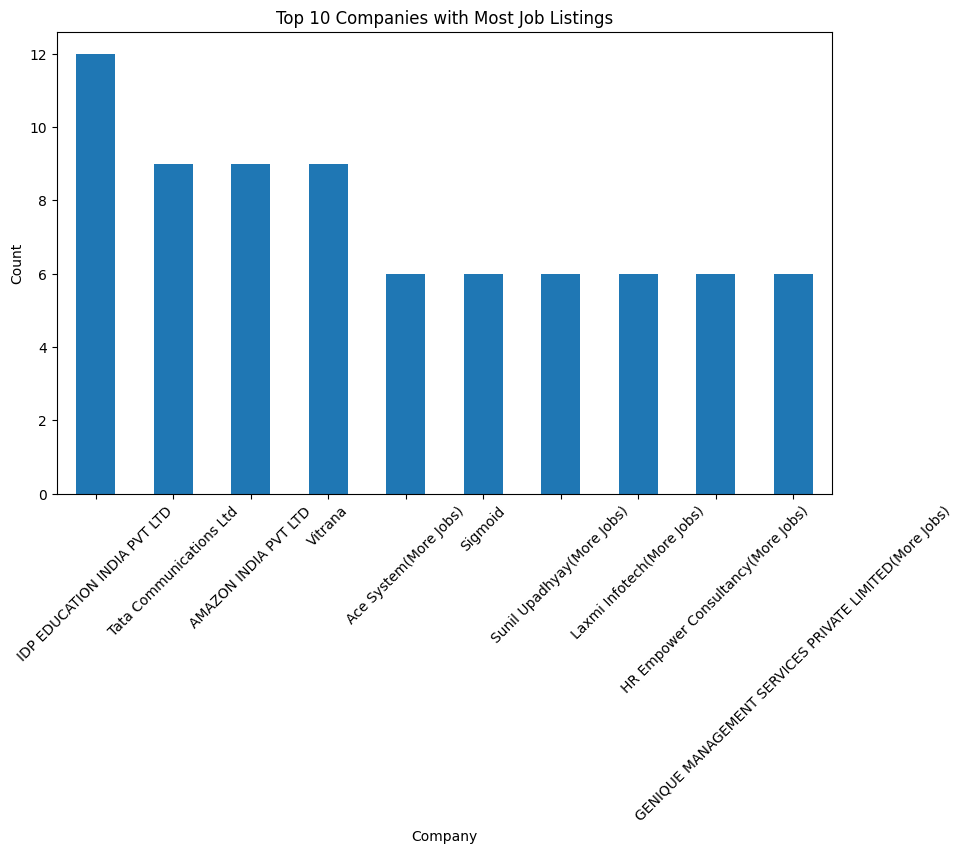

In [18]:
import matplotlib.pyplot as plt

# Count job listings by company
company_counts = df['Company'].value_counts()

# Plot the top 10 companies with the most job listings
top_10_companies = company_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_companies.plot(kind='bar')
plt.title('Top 10 Companies with Most Job Listings')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Observation**
 *  We can see the top 10 job providing companies and from them "IDP EDUCATION INDIA PVT LTD" is top one company.

**2. Skills that are most demanding in company.**

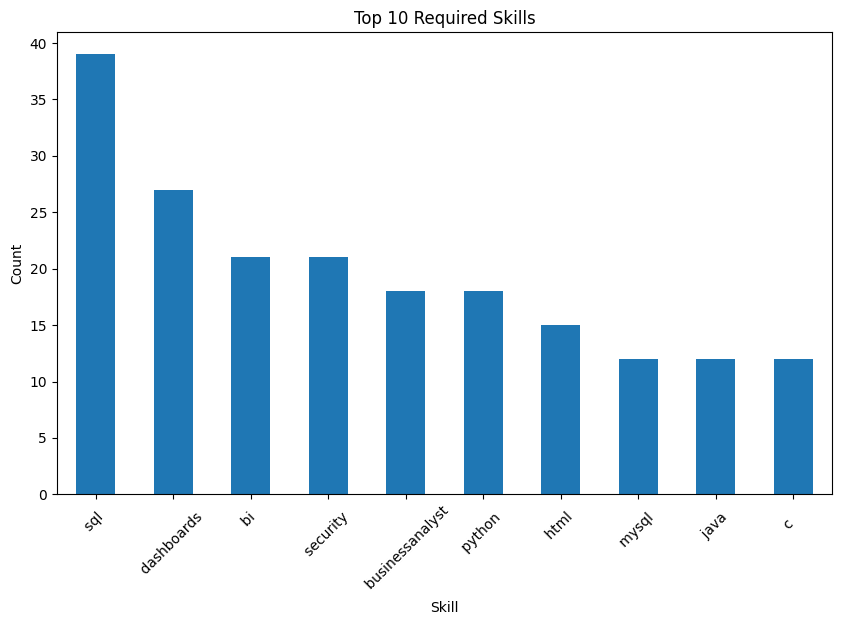

In [19]:
# Plot the most common skills required
skills_counts = df['Skills'].str.split(', ').explode().value_counts()

# Plot the top 10 skills
top_10_skills = skills_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_skills.plot(kind='bar')
plt.title('Top 10 Required Skills')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Observation**
*   From above graph we can see "SQL" is most demanding skill in data analyst field and second one is skill of creating "Dashboard".

**3. Most job experince demanded by company**

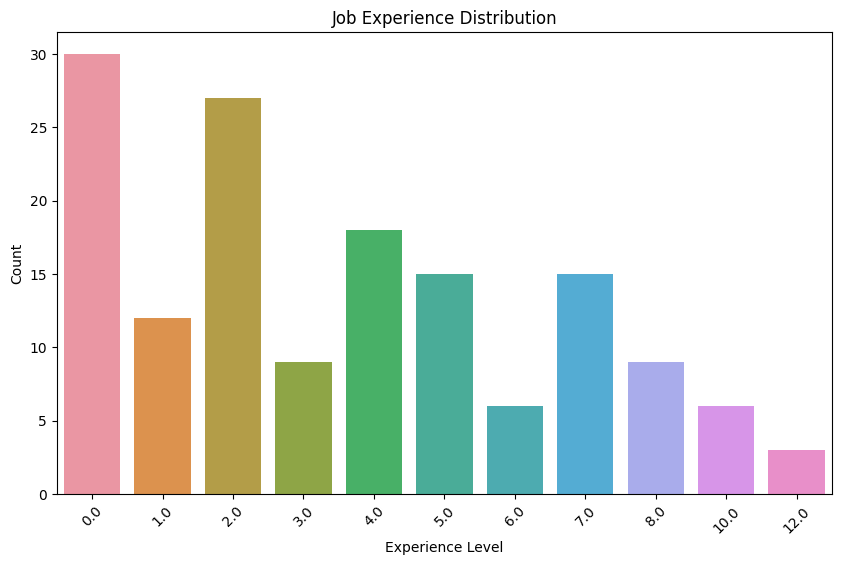

In [20]:
import seaborn as sns

# Plot the distribution of job experience levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Exp')
plt.title('Job Experience Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Observation**
*  From above graph we can see that most of the jobs in company for freashers and least jobs for more than 5 years.

**4. Most jobs opening at which location in India**

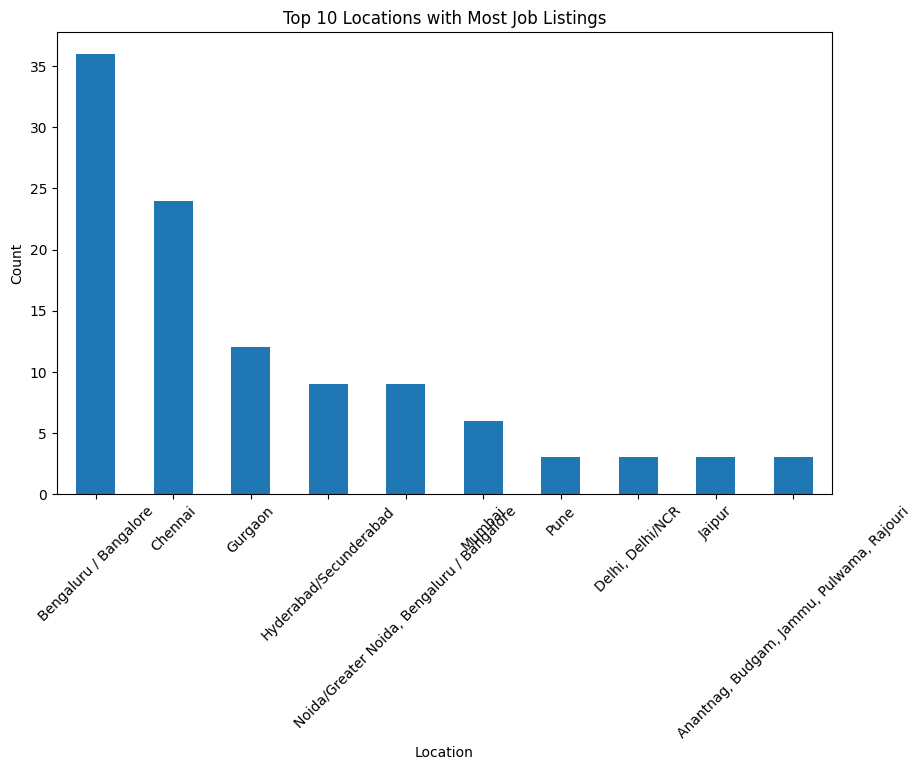

In [21]:
import matplotlib.pyplot as plt

# Count job listings by location
location_counts = df['Location(s)'].value_counts()

# Plot the top 10 locations with the most job listings
top_10_locations = location_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar')
plt.title('Top 10 Locations with Most Job Listings')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Observation**
*  From above graph we can see most of the jobs opening for Data Analyst in Bengluru and Chennai location and least in Jammu and Pune.

**5. Combine all job descriptions into a single string**

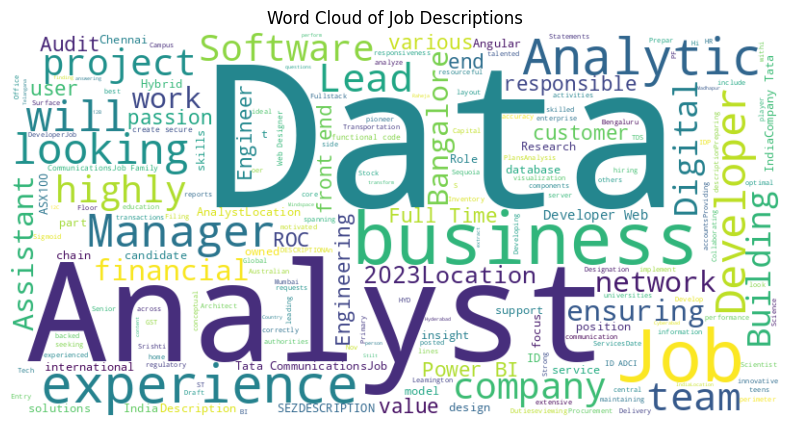

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all job descriptions into a single string
job_descriptions = " ".join(df1['Desc'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_descriptions)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Job Descriptions')
plt.show()

## **Observation:**
*  This word cloud displays the most common words used in job descriptions, where the size of each word corresponds to its frequency.
*  If you add these words in your resume , there is really high chance you getting shortlisted through their ATS website.

# **Conclusion:**

This web scraping project provides a practical example of how to collect job-related information from the TimesJobs website using Python. It demonstrates the use of popular libraries like requests, BeautifulSoup, and pandas to automate the data extraction process. The script can be modified to scrape job listings for different positions, locations, or additional details, making it a versatile tool for gathering data from online job portals. The extracted data is organized in a structured format, making it easy for further analysis or reference and got important insights from data.